# Classification of COVID-19 Chest X-Ray Images
The COVID-19 pandemic has definitely changed life for everybody on the planet. It does not discriminate, rich or poor, white or black, left or right, it has been the harbinger of hardships for all. The most important step to prevent the spread of this disease is early detection so that the carrier does not spread it. COVID testing kits provide really accurate results but adding another layer of identification can only be beneficial. Chest radiographs of symptomatic COVID patients can be used to check for damage to the lungs. We can use Deep Learning to find characteristics of COVID-19 radiographs through CNNs and in turn help predict if a patient is positive for the disease. Through this project we will be looking at chest radiographs from the COVID-19 Radiography Dataset from Kaggle and use it to classify the images into four classes corresponding to normal patients, patients with COVID-19, patients with viral pneumonia and patients with lung opacity (another health disorder affecting the lungs) and use this model on a test dataset to predict whether a patient has COVID-19. We will be focussing on getting a high value for recall as it is more desirable to have false positives for COVID-19 than false negatives as it would prevent the spread of the disease and also avoid life threatening situations.

## Contents
1. Preprocessing and Visualization of Images
2. Builiding CNN Model and Evaluating Performance
3. Building Transfer Learning Model and Evaluating Performance
4. Conclusion

### 1. Preprocessing and Visualization of Images
We will be using images from the COVID-19 Radiography Database dataset from Kaggle. The images from these datasets belong to four classes (COVID-19, Viral Pneumonia, Lung Opacity and Normal). The images for these four classes are stored in different folders. We will be using the os library on Python to get a filepath for all the image classes and store them in a dataset.

In [1]:
# Loading Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import os

In [2]:
# Setting Path Directories
main_dir = "COVID-19_Radiography_Dataset"

covid_dir = os.path.join(main_dir,'COVID')
vp_dir = os.path.join(main_dir,'VIRAL')
lo_dir = os.path.join(main_dir,'OPACITY')
normal_dir = os.path.join(main_dir,'NORMAL')

In [3]:
# Printing Sample File Names
covid_names = os.listdir(covid_dir)
print(covid_names[:10])

vp_names = os.listdir(vp_dir)
print(vp_names[:10])

lo_names = os.listdir(lo_dir)
print(lo_names[:10])

normal_names = os.listdir(normal_dir)
print(normal_names[:10])

['COVID-1.png', 'COVID-10.png', 'COVID-100.png', 'COVID-1000.png', 'COVID-1001.png', 'COVID-1002.png', 'COVID-1003.png', 'COVID-1004.png', 'COVID-1005.png', 'COVID-1006.png']
['Viral Pneumonia-1.png', 'Viral Pneumonia-10.png', 'Viral Pneumonia-100.png', 'Viral Pneumonia-1000.png', 'Viral Pneumonia-1001.png', 'Viral Pneumonia-1002.png', 'Viral Pneumonia-1003.png', 'Viral Pneumonia-1004.png', 'Viral Pneumonia-1005.png', 'Viral Pneumonia-1006.png']
['Lung_Opacity-1.png', 'Lung_Opacity-10.png', 'Lung_Opacity-100.png', 'Lung_Opacity-1000.png', 'Lung_Opacity-1001.png', 'Lung_Opacity-1002.png', 'Lung_Opacity-1003.png', 'Lung_Opacity-1004.png', 'Lung_Opacity-1005.png', 'Lung_Opacity-1006.png']
['Normal-1.png', 'Normal-10.png', 'Normal-100.png', 'Normal-1000.png', 'Normal-10000.png', 'Normal-10001.png', 'Normal-10002.png', 'Normal-10003.png', 'Normal-10004.png', 'Normal-10005.png']


In [4]:
# Finding No. of Images in each Class
print("Total No. of Images:",len(covid_names+vp_names+lo_names+normal_names))
print("No. of COVID-19 Images:",len(covid_names))
print("No. of Viral Pneumonia Images:",len(vp_names))
print("No. of Lung Opacity Images:",len(lo_names))
print("No. of Normal Images:",len(normal_names))

Total No. of Images: 21165
No. of COVID-19 Images: 3616
No. of Viral Pneumonia Images: 1345
No. of Lung Opacity Images: 6012
No. of Normal Images: 10192


We see that we have ~21k images of 4 classes. Our classes however seem to be imbalanced.

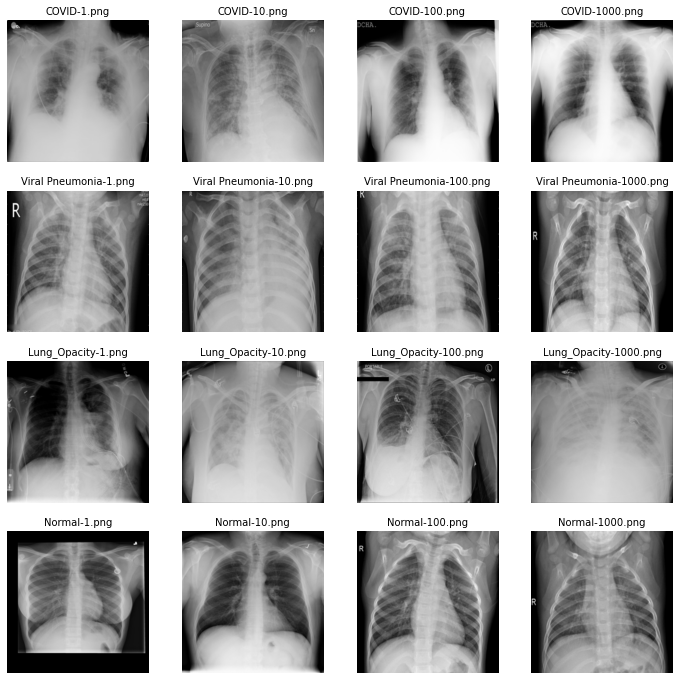

In [5]:
# Visualizing Image Samples
import cv2

fig = plt.gcf()
fig.set_size_inches(12,12)

covid_pic = [os.path.join(covid_dir,filename) for filename in covid_names[0:4]]
vp_pic = [os.path.join(vp_dir,filename) for filename in vp_names[0:4]]
lo_pic = [os.path.join(lo_dir,filename) for filename in lo_names[0:4]]
normal_pic = [os.path.join(normal_dir,filename) for filename in normal_names[0:4]]
merged_list = covid_pic + vp_pic + lo_pic + normal_pic

for i, img_path in enumerate(merged_list):
  data = img_path.split('/',2)[2]
  sp = plt.subplot(4,4,i+1)
  sp.axis('Off')
  img = cv2.imread(img_path)
  sp.set_title(data,fontsize = 10)
  plt.imshow(img,cmap = 'gray')

plt.show()

Above we can see some sample images of all 4 classes using the cv2 and matplotlib libraries. Let us apply some common image functions on our X-Ray image to check if we can see some more distinguishable characteristics.

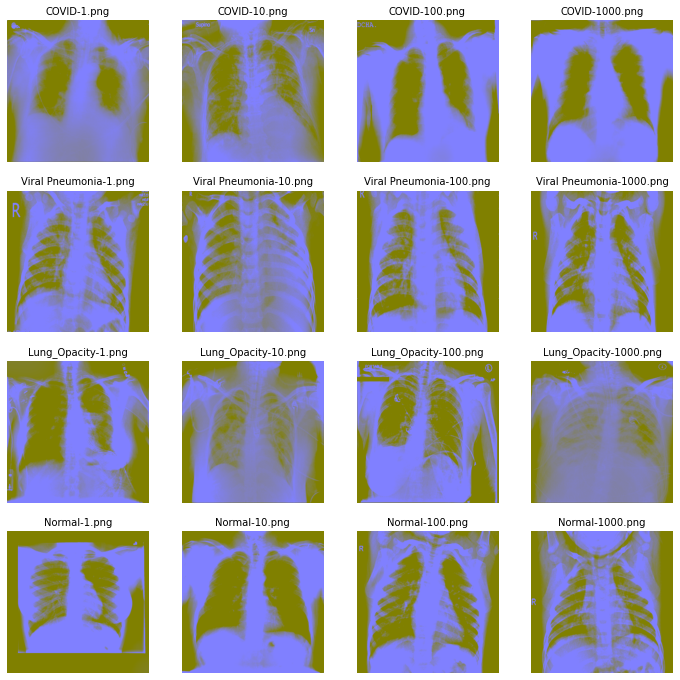

In [6]:
# Visualizing Images with Gaussian Blur
fig = plt.gcf()
fig.set_size_inches(12,12)

for i, img_path in enumerate(merged_list):
    data = img_path.split('/',2)[2]
    sp = plt.subplot(4,4,i+1)
    sp.axis('Off')
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0,0), 512/10), -4, 128)
    sp.set_title(data,fontsize = 10)
    plt.imshow(img)
    
plt.show()

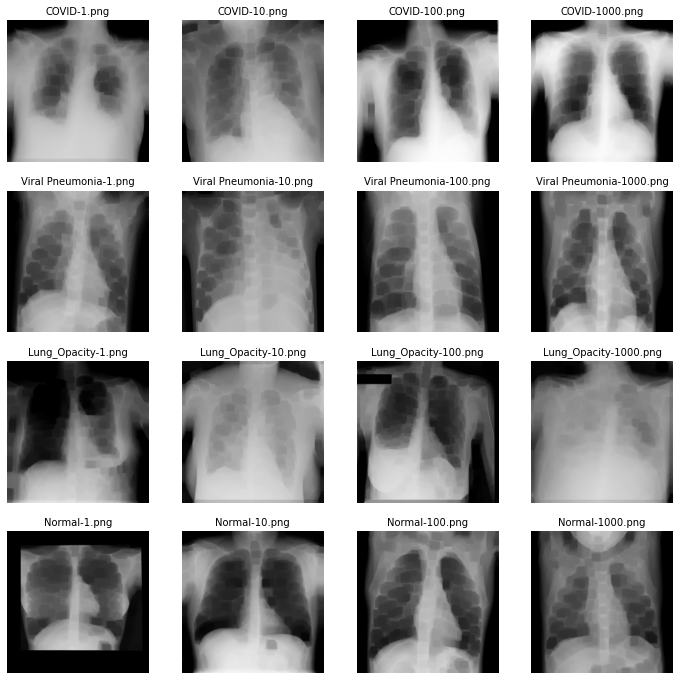

In [7]:
# Visualizing Images with Erosion
fig = plt.gcf()
fig.set_size_inches(12,12)


for i, img_path in enumerate(merged_list):
    data = img_path.split('/',2)[2]
    sp = plt.subplot(4,4,i+1)
    sp.axis('Off')
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    kernel = np.ones((5, 5), np.uint8)
    img_erosion = cv2.erode(img, kernel, iterations=3)
    sp.set_title(data,fontsize = 10)
    plt.imshow(img_erosion)
    
plt.show()

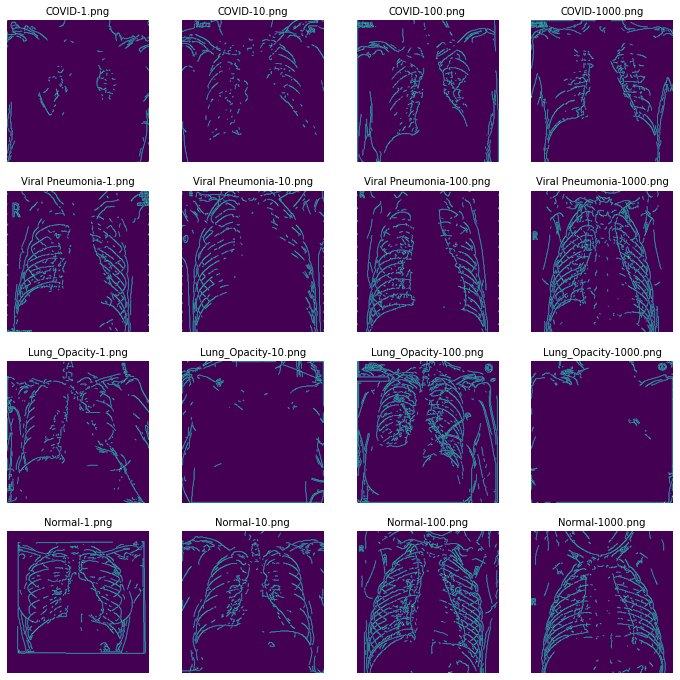

In [8]:
# Visualizing Image Edges
fig = plt.gcf()
fig.set_size_inches(12,12)

for i, img_path in enumerate(merged_list):
    data = img_path.split('/',2)[2]
    sp = plt.subplot(4,4,i+1)
    sp.axis('Off')
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(img, 80, 100)
    sp.set_title(data,fontsize = 10)
    plt.imshow(edges)
    
plt.show()

We saw earlier that our classes had varying number of images. To create a balanced dataset and to trim down for memory purposes we will be loading only 1000 images per class with dimensions of 224x224x3 pixels and store it in a single dataset with labels as 0,1,2 and 3 corresponding to classes COVID-19, Viral Pneumonia, Lung Opacity and Normal respectively.

In [9]:
# Loading 1000 Images per Class to create Balanced Classes
from tensorflow.keras.preprocessing.image import load_img

covid_pic = [os.path.join(covid_dir,filename) for filename in covid_names[0:1000]]
vp_pic = [os.path.join(vp_dir,filename) for filename in vp_names[0:1000]]
lo_pic = [os.path.join(lo_dir,filename) for filename in lo_names[0:1000]]
normal_pic = [os.path.join(normal_dir,filename) for filename in normal_names[0:1000]]

covid_images = []
vp_images = []
lo_images = []
normal_images = []

for img_path in covid_pic:
    covid_images.append(load_img(str(img_path),target_size=(224,224,3)))
    
for img_path in vp_pic:
    vp_images.append(load_img(str(img_path),target_size=(224,224,3)))
    
for img_path in lo_pic:
    lo_images.append(load_img(str(img_path),target_size=(224,224,3)))
    
for img_path in normal_pic:
    normal_images.append(load_img(str(img_path),target_size=(224,224,3)))

In [10]:
# Storing Images as Arrays in Dataset
from tensorflow.keras.preprocessing.image import img_to_array

all_images = []
labels = []

for img in covid_images:
    all_images.append(img_to_array(img))
    labels.append(0)
    
for img in vp_images:
    all_images.append(img_to_array(img))
    labels.append(1)

for img in lo_images:
    all_images.append(img_to_array(img))
    labels.append(2)

for img in normal_images:
    all_images.append(img_to_array(img))
    labels.append(3)

In [11]:
# Creating a Dictionary for Label Mapping

label_mapping = {0 : 'COVID-19', 1 : 'Viral Pneumonia', 2 : 'Lung Opacity', 3 : 'Normal'}

We will be converting our labels to categorical values using One-Hot Encoding and splitting our dataset into train and test splits with a ratio of 75:25.

In [12]:
# One-Hot Encoding Labels
from tensorflow.keras.utils import to_categorical

all_images = np.array(all_images)
labels = to_categorical(labels)

print(all_images.shape)
print(labels.shape)

(4000, 224, 224, 3)
(4000, 4)


In [13]:
# Train-Test Split of Images and Labels
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_images,labels)

print("X_train Shape:",X_train.shape)
print("X_test Shape:",X_test.shape)
print("y_train Shape:",y_train.shape)
print("y_test Shape:",y_test.shape)

X_train Shape: (3000, 224, 224, 3)
X_test Shape: (1000, 224, 224, 3)
y_train Shape: (3000, 4)
y_test Shape: (1000, 4)


We will be using the ImageDataGenerator Class from Keras to help us generate our training and validation datasets. Additionally this will help us augment our image dataset using random zoom, shear and flip which helps increase the diversity of our training dataset which in turn helps increase accuracy with new images.

In [14]:
# Data Augmentation using ImageDataGenerator Class
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dgen_train = ImageDataGenerator(rescale = 1/255,validation_split = 0.2,zoom_range = 0.2,shear_range = 0.2,horizontal_flip = True)

train_generator = dgen_train.flow(X_train,y_train,subset = 'training',batch_size = 40)
validation_generator = dgen_train.flow(X_train,y_train,subset = 'validation',batch_size = 40,shuffle = False)

### 2. Builidng CNN Model and Evaluating Performance
First we will be attempting to build our own CNN model using Sequential Class from Keras with Convolution, Max Pooling and Dropout layers connected to a Dense network. We will then train this model with our training data and evaluate its performance on the test data.

In [15]:
# Building CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0

We will be using categorical cross entropy as our loss function and will be monitoring the accuracy, recall and precision of the model with training and validation data. We will also be adding a **class weight of 3** to the COVID-19 class and a weight of 1 to the other classes as we are mainly concerned with prediction of COVID-19 and this would aid in improving performance of the model with that class.

In [16]:
# Compiling CNN Model
from tensorflow.keras.metrics import Precision, Recall

model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy',Recall(name='recall'),Precision(name='precision')])

In [17]:
# Training CNN Model
h1 = model.fit(train_generator,epochs=10,validation_data=validation_generator,class_weight={0:3,1:1,2:1,3:1})

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/10
60/60 [==============================] - 235s 4s/step - loss: 4.7556 - accuracy: 0.3887 - recall: 0.1787 - precision: 0.4316 - val_loss: 1.1461 - val_accuracy: 0.4883 - val_recall: 0.2433 - val_precision: 0.5489
Epoch 2/10
60/60 [==============================] - 229s 4s/step - loss: 1.2517 - accuracy: 0.5692 - recall: 0.4696 - precision: 0.6254 - val_loss: 0.8971 - val_accuracy: 0.6567 - val_recall: 0.4700 - val_precision: 0.7231
Epoch 3/10
60/60 [==============================] - 1582s 27s/step - loss: 1.1567 - accuracy: 0.6121 - recall: 0.5304 - precision: 0.6654 - val_loss: 0.9656 - val_accuracy: 0.6250 - val_recall: 0.4767 - val_precision: 0.6925
Epoch 4/10
60/60 [==============================] - 226s 4s/step - loss: 1.0582 - accuracy: 0.6562 - recall: 0.5929 - precision: 0.6901 - val_loss: 0.7720 - val_accuracy: 0.7050 - val_recall:

In [18]:
acc = h1.history['accuracy']
val_acc = h1.history['val_accuracy']
loss = h1.history['loss']
val_loss = h1.history['val_loss']
epochs = range(1,len(acc)+1)

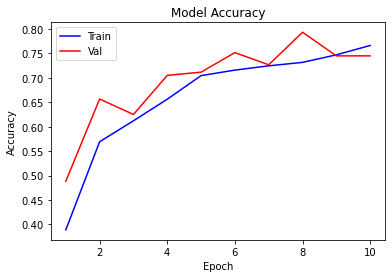

In [19]:
# Plotting Accuracy Curve
plt.plot(epochs, acc, 'b')
plt.plot(epochs, val_acc, 'r')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

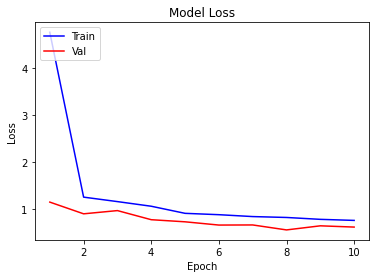

In [20]:
# Plotting Loss Curve
plt.plot(epochs, loss, 'b')
plt.plot(epochs, val_loss, 'r')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

After training our model, we will be looking at the classification report and confusion matrix to evaluate its performance with the test dataset. As mentioned earlier, we will be concentrating on the recall value for COVID-19 class (Class 0) to determine how suitable our model would be for real world use.

In [21]:
# Obtaining Classification Report
from sklearn.metrics import classification_report

X_test_norm = X_test/255

y_pred = model.predict(X_test_norm, batch_size=40)

y_test_labels = [np.argmax(i) for i in y_test]
y_pred_labels = [np.argmax(i) for i in y_pred]

print(classification_report(y_test_labels, y_pred_labels, digits = 3))

              precision    recall  f1-score   support

           0      0.698     0.802     0.747       248
           1      0.968     0.802     0.877       262
           2      0.722     0.722     0.722       234
           3      0.735     0.758     0.746       256

    accuracy                          0.772      1000
   macro avg      0.781     0.771     0.773      1000
weighted avg      0.784     0.772     0.775      1000



In [22]:
# Obtaining Confusion Matrix
cm = tf.math.confusion_matrix(labels=y_test_labels,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[199,   2,  30,  17],
       [  9, 210,  14,  29],
       [ 41,   0, 169,  24],
       [ 36,   5,  21, 194]], dtype=int32)>

Text(114.0, 0.5, 'Truth')

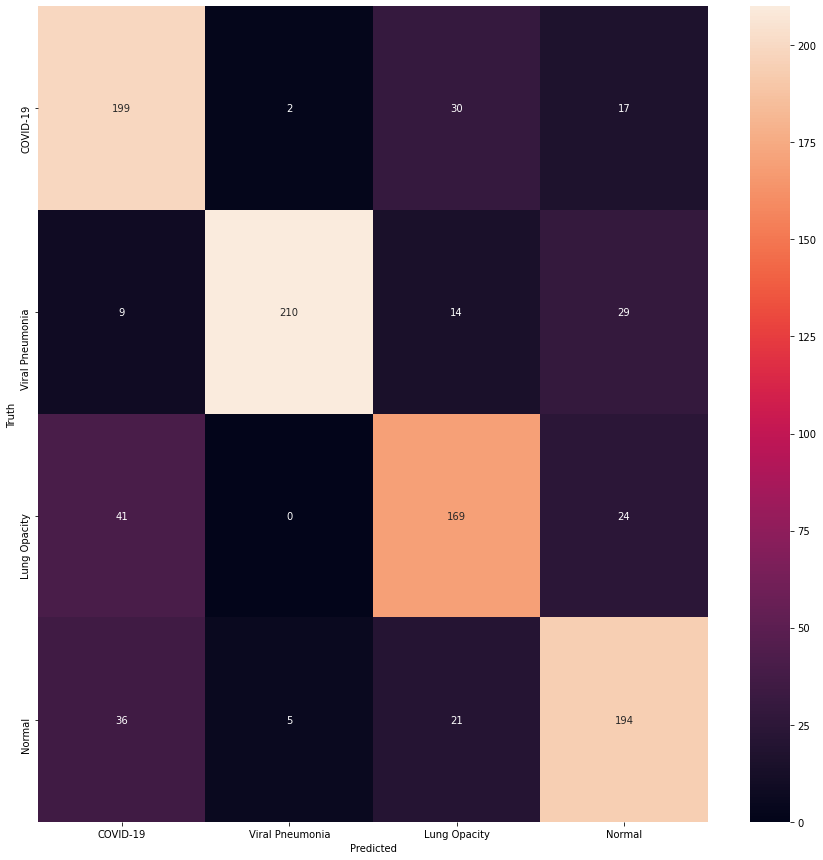

In [23]:
# Visualizing Confusion Matrix
plt.figure(figsize = (15,15))
sns.heatmap(cm, annot=True, fmt='d')
plt.xticks([i+0.5 for i in range(0,4)],[label_mapping[i] for i in range(0,4)])
plt.yticks([i+0.5 for i in range(0,4)],[label_mapping[i] for i in range(0,4)])
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [24]:
# Evaluating Performance on Test Set
loss, accuracy, recall, precision = model.evaluate(X_test_norm, y_test)
print("Test Set Accuracy: ",accuracy*100,"%")
print("Test Set Recall: ",recall*100,"%")
print("Test Set Precision: ",precision*100,"%")

32/32 [==============================] - 25s 743ms/step - loss: 0.5834 - accuracy: 0.7720 - recall: 0.6990 - precision: 0.8128
Test Set Accuracy:  77.20000147819519 %
Test Set Recall:  69.90000009536743 %
Test Set Precision:  81.27906918525696 %


We find that our model has an accuracy of ~ 77% on our test dataset. However it has a recall value of only ~ 70% on the test dataset and ~ 80% with Class 0 (COVID-19). By looking at the confusion matrix we can see that the model is classifying a good number of COVID-19 images as Lung Opacity and Normal. Let's see if we can prevent this by using a Transfer Learning model.

### 3. Building Transfer Learning Model and Evaluating Performance
To improve upon the performance of our CNN model we will be using the InceptionResNet model from Keras with imagenet weights. Once again we will be adding a wieght of 3 to our COVID-19 class to emphasize on its performance.

In [33]:
# Loading InceptionResNetV2 Model
inc = tf.keras.applications.InceptionResNetV2(
    include_top = False,
    weights = 'imagenet',
    input_shape = (224,224,3),
    classifier_activation = 'softmax'
)

In [34]:
# Set Model layers as non-trainable
for layer in inc.layers:           
    layer.trainable = False

In [35]:
# Adding final layer to the Model for classification of 4 classes
from tensorflow.keras.models import Model

flat = Flatten()(inc.output)
prediction= Dense(units=4 , activation='softmax')(flat)

model = Model(inc.input,prediction)

model.summary()

In [36]:
# Compiling Model
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy',Recall(name='recall'),Precision(name='precision')])

In [37]:
# Training Model
h2 = model.fit(train_generator,epochs=10,validation_data=validation_generator,class_weight={0:3,1:1,2:1,3:1})

Epoch 1/10
60/60 [==============================] - 992s 16s/step - loss: 5.7090 - accuracy: 0.6146 - recall: 0.6117 - precision: 0.6178 - val_loss: 1.6954 - val_accuracy: 0.7533 - val_recall: 0.7500 - val_precision: 0.7563
Epoch 2/10
60/60 [==============================] - 961s 16s/step - loss: 1.7807 - accuracy: 0.7604 - recall: 0.7575 - precision: 0.7607 - val_loss: 2.9292 - val_accuracy: 0.6567 - val_recall: 0.6550 - val_precision: 0.6583
Epoch 3/10
60/60 [==============================] - 1970s 33s/step - loss: 2.4205 - accuracy: 0.7538 - recall: 0.7533 - precision: 0.7555 - val_loss: 1.0929 - val_accuracy: 0.8200 - val_recall: 0.8183 - val_precision: 0.8211
Epoch 4/10
60/60 [==============================] - 1003s 17s/step - loss: 1.4525 - accuracy: 0.7929 - recall: 0.7929 - precision: 0.7949 - val_loss: 1.5060 - val_accuracy: 0.7750 - val_recall: 0.7733 - val_precision: 0.7759
Epoch 5/10
60/60 [==============================] - 1057s 18s/step - loss: 1.8771 - accuracy: 0.7796 -

In [38]:
acc = h2.history['accuracy']
val_acc = h2.history['val_accuracy']
loss = h2.history['loss']
val_loss = h2.history['val_loss']
epochs = range(1,len(acc)+1)

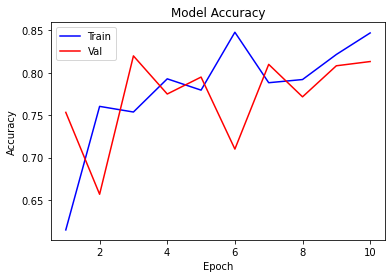

In [39]:
# Plotting Accuracy Curve
plt.plot(epochs, acc, 'b')
plt.plot(epochs, val_acc, 'r')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

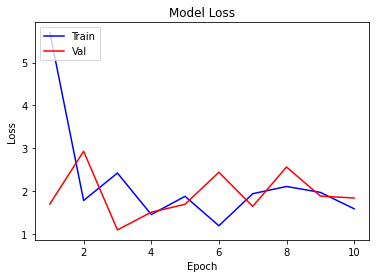

In [40]:
# Plotting Loss Curve
plt.plot(epochs, loss, 'b')
plt.plot(epochs, val_loss, 'r')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [41]:
# Obtaining Classification Report
from sklearn.metrics import classification_report

X_test_norm = X_test/255

y_pred = model.predict(X_test_norm, batch_size=40)

y_test_labels = [np.argmax(i) for i in y_test]
y_pred_labels = [np.argmax(i) for i in y_pred]

print(classification_report(y_test_labels, y_pred_labels, digits = 3))

              precision    recall  f1-score   support

           0      0.738     0.875     0.801       248
           1      0.957     0.859     0.905       262
           2      0.732     0.863     0.792       234
           3      0.841     0.641     0.727       256

    accuracy                          0.808      1000
   macro avg      0.817     0.809     0.806      1000
weighted avg      0.820     0.808     0.807      1000



In [42]:
# Obtaining Confusion Matrix
cm = tf.math.confusion_matrix(labels=y_test_labels,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[217,   1,  26,   4],
       [ 11, 225,   5,  21],
       [ 26,   0, 202,   6],
       [ 40,   9,  43, 164]], dtype=int32)>

Text(114.0, 0.5, 'Truth')

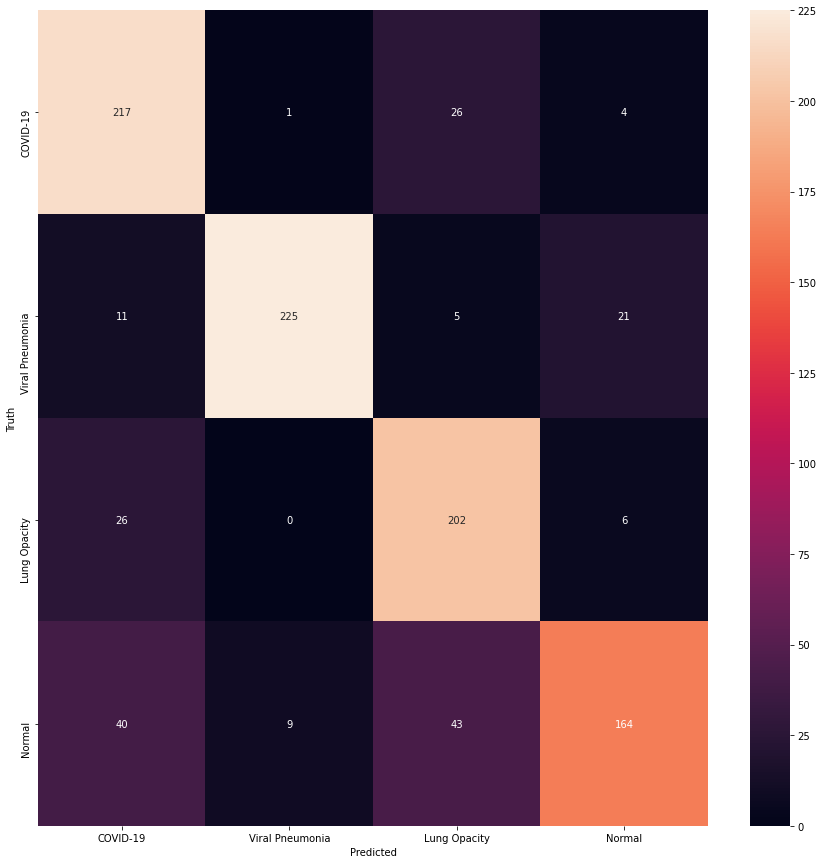

In [43]:
# Visualizing Confusion Matrix
plt.figure(figsize = (15,15))
sns.heatmap(cm, annot=True, fmt='d')
plt.xticks([i+0.5 for i in range(0,4)],[label_mapping[i] for i in range(0,4)])
plt.yticks([i+0.5 for i in range(0,4)],[label_mapping[i] for i in range(0,4)])
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [44]:
# Evaluating Performance on Test Set
loss, accuracy, recall, precision = model.evaluate(X_test_norm, y_test)
print("Test Set Accuracy: ",accuracy*100,"%")
print("Test Set Recall: ",recall*100,"%")
print("Test Set Precision: ",precision*100,"%")

32/32 [==============================] - 321s 10s/step - loss: 1.7030 - accuracy: 0.8080 - recall: 0.8080 - precision: 0.8080
Test Set Accuracy:  80.80000281333923 %
Test Set Recall:  80.80000281333923 %
Test Set Precision:  80.80000281333923 %


We now see that our model has a test set accuracy of ~ 81% which is an improvement over our CNN model. More importantly we have a recall value of ~ 81% on the test dataset and **~ 88%** wit Class 0 (COVID-19). We even have a high precision value of ~ 84% for Class 3 (Normal) which is also desirable. Hence, our Transfer Learning Model has provided us with better resuts and will be used as our final model.

### 4. Conclusion
After comparing our CNN model we built ourselves and our Transfer Learning model we see that the latter gives us a better performance with the new test data. It gave us an accuracy of 81% across all 4 classes but the highlight of its performance is the 88% recall with the COVID-19 class and the 84% precision value with the Normal class. The high recall value for the COVID-19 class makes sure that the number of positive COVID-19 cases predicted as negative would be minimized. Additionally the high precision value for the Normal class makes sure that the number of negative Normal cases predicted postitively as Normal would be minimized. For a datset with 4 classes and memory restrictions, I feel we have achieved what we were aiming for with these recall and precision values.

This project has helped me learn a lot about how deep learning models work and by seeing my models able to provide real-world value it only encourages me to learn more. Hopefully by going along this journey I'll be able to develop more robust applications that can be more easily implemented, helping people in some way.